In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# K-shot values (x-axis)
k_shots = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

# F1 Scores data based on the provided image (handle potential missing values with np.nan)
# Note: '-' in BERT data is replaced with np.nan
data = {
    "MLP": [0.32, 0.0, 0.32, 0.0, 0.09, 0.0, 0.24, 0.12, 0.29, 0.0, 0.24, 0.24, 0.30, 0.30],
    "LSTM": [0.32, 0.32, 0.0, 0.15, 0.32, 0.0, 0.21, 0.33, 0.33, 0.32, 0.29, 0.29, 0.16, 0.18],
    "BERT": [0.15, 0.43, 0.34, 0.60, 0.71, 0.54, np.nan, 0.63, np.nan, 0.72, 0.62, 0.73, 0.62, 0.54],
    "RoBERTa": [0.21, 0.48, 0.39, 0.65, 0.75, 0.58, 0.66, 0.68, 0.73, 0.76, 0.67, 0.77, 0.67, 0.59],
    "LLaMa": [0.81, 0.80, 0.79, 0.81, 0.80, 0.80, 0.80, 0.80, 0.81, 0.81, 0.81, 0.80, 0.80, 0.80],
    "Gemma": [0.72, 0.79, 0.60, 0.64, 0.69, 0.70, 0.53, 0.58, 0.71, 0.64, 0.51, 0.67, 0.47, 0.40],
    "GAT (DTH)": [0.38, 0.35, 0.30, 0.25, 0.25, 0.24, 0.27, 0.37, 0.33, 0.32, 0.32, 0.32, 0.31, 0.31],
    "SAGE": [0.32, 0.35, 0.31, 0.0, 0.32, 0.31, 0.0, 0.32, 0.32, 0.31, 0.0, 0.31, 0.0, 0.31]
}

/tmp/ipykernel_427099/4234706117.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', num_models) # Get enough colors


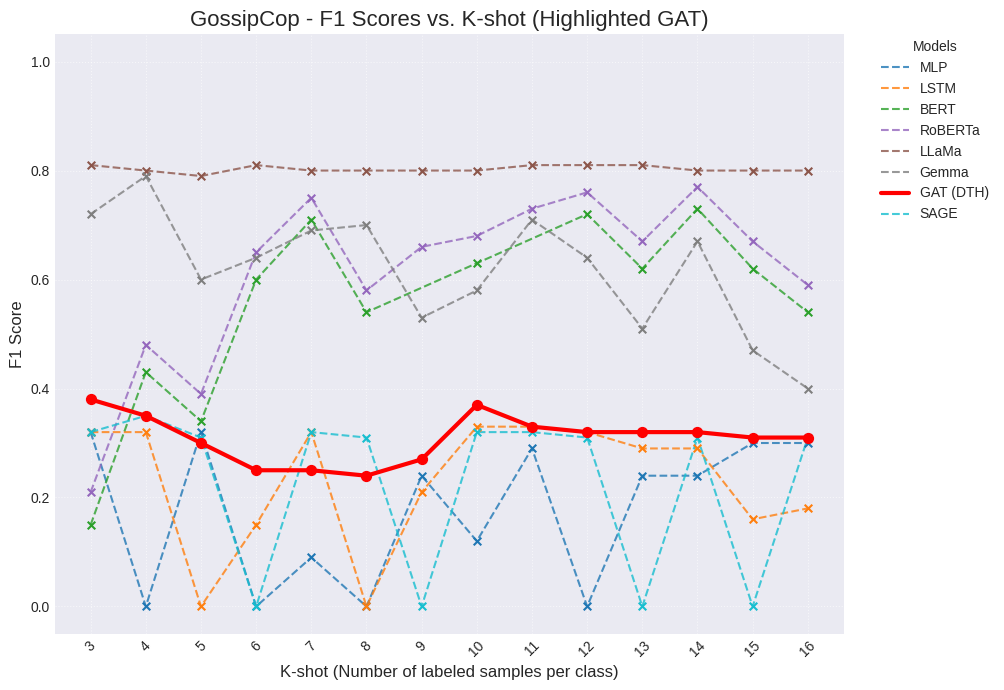

In [4]:
# Create a pandas DataFrame
df = pd.DataFrame(data, index=k_shots)

# --- Interpolate NaN values for continuous lines ---
# We create a separate DataFrame for plotting lines to avoid altering original data
# 'linear' interpolation connects the points across NaN gaps
df_interpolated = df.interpolate(method='linear', limit_direction='both', axis=0)

# --- Plotting ---
plt.style.use('seaborn-v0_8-darkgrid') # Use a nice style
fig, ax = plt.subplots(figsize=(12, 7)) # Adjust figure size

# Define colors (optional: give GAT a specific color)
num_models = len(df.columns)
colors = plt.cm.get_cmap('tab10', num_models) # Get enough colors
gat_color = 'red' # Make GAT red
other_lines_alpha = 0.8 # Make other lines slightly transparent

# Plot each model's performance
for i, model_name in enumerate(df.columns):
    # Get data series
    original_scores = df[model_name]
    interpolated_scores = df_interpolated[model_name]

    # Set styles based on model name
    if model_name == "GAT (DTH)":
        line_style = '-'  # Solid line for GAT
        line_width = 3.0  # Thicker line for GAT
        current_color = gat_color
        marker_style = 'o' # Circle marker
        marker_size = 50 # Larger marker
        line_alpha = 1.0
        z_order = 10 # Plot GAT on top
    else:
        line_style = '--'  # Dashed line for others
        line_width = 1.5  # Standard width for others
        current_color = colors(i)
        marker_style = 'x' # Cross marker for others
        marker_size = 30 # Standard marker size
        line_alpha = other_lines_alpha
        z_order = 5 # Plot others below GAT

    # Plot the (potentially interpolated) line for continuity
    ax.plot(
        df_interpolated.index,
        interpolated_scores,
        label=model_name, # Label is added here for the legend
        linestyle=line_style,
        linewidth=line_width,
        color=current_color,
        alpha=line_alpha, # Control transparency
        zorder=z_order
    )

    # Plot markers based on ORIGINAL data (NaNs will be skipped)
    ax.scatter(
        df.index, # Use original k_shots
        original_scores, # Use original data with NaNs
        color=current_color,
        marker=marker_style,
        s=marker_size, # Marker size
        zorder=z_order + 1 # Ensure markers are on top of lines
        # No label here to avoid duplicate legend entries
    )

# --- Customize the Plot ---
ax.set_title('GossipCop - F1 Scores vs. K-shot (Highlighted GAT)', fontsize=16)
ax.set_xlabel('K-shot (Number of labeled samples per class)', fontsize=12)
ax.set_ylabel('F1 Score', fontsize=12)

# Set x-axis ticks to match the k_shot values
ax.set_xticks(k_shots)
ax.tick_params(axis='x', rotation=45)

# Set y-axis limits
ax.set_ylim(bottom=-0.05, top=1.05)

# Add grid lines
ax.grid(True, linestyle=':', alpha=0.6) # Use dotted grid lines

# Add legend - place it outside the plot area
ax.legend(title="Models", bbox_to_anchor=(1.04, 1), loc="upper left", borderaxespad=0.)

# Adjust layout to prevent labels/legend from being cut off
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust right margin for legend

# Show the plot
plt.show()

/tmp/ipykernel_427099/275109716.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', num_models) # Get enough colors


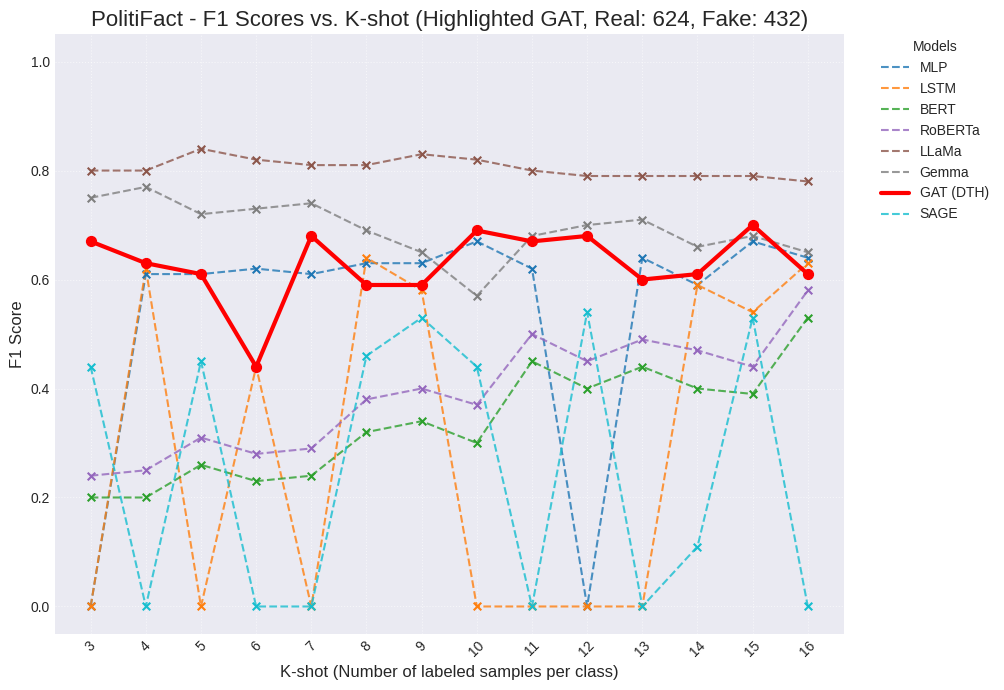

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# K-shot values (x-axis)
k_shots = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

# F1 Scores data for PolitiFact based on the provided image
# (Real: 624, Fake: 432)
data = {
    "MLP": [0.0, 0.61, 0.61, 0.62, 0.61, 0.63, 0.63, 0.67, 0.62, 0.0, 0.64, 0.59, 0.67, 0.64],
    "LSTM": [0.0, 0.62, 0.0, 0.44, 0.0, 0.64, 0.58, 0.0, 0.0, 0.0, 0.0, 0.59, 0.54, 0.63],
    "BERT": [0.20, 0.20, 0.26, 0.23, 0.24, 0.32, 0.34, 0.30, 0.45, 0.40, 0.44, 0.40, 0.39, 0.53],
    "RoBERTa": [0.24, 0.25, 0.31, 0.28, 0.29, 0.38, 0.40, 0.37, 0.50, 0.45, 0.49, 0.47, 0.44, 0.58],
    "LLaMa": [0.80, 0.80, 0.84, 0.82, 0.81, 0.81, 0.83, 0.82, 0.80, 0.79, 0.79, 0.79, 0.79, 0.78],
    "Gemma": [0.75, 0.77, 0.72, 0.73, 0.74, 0.69, 0.65, 0.57, 0.68, 0.70, 0.71, 0.66, 0.68, 0.65],
    "GAT (DTH)": [0.67, 0.63, 0.61, 0.44, 0.68, 0.59, 0.59, 0.69, 0.67, 0.68, 0.60, 0.61, 0.70, 0.61],
    "SAGE": [0.44, 0.0, 0.45, 0.0, 0.0, 0.46, 0.53, 0.44, 0.0, 0.54, 0.0, 0.11, 0.53, 0.0]
}

# Create a pandas DataFrame
df = pd.DataFrame(data, index=k_shots)

# --- Interpolate NaN values for continuous lines (Optional for this data, but kept for consistency) ---
# This step doesn't change anything if there are no NaNs, but makes the code robust.
df_interpolated = df.interpolate(method='linear', limit_direction='both', axis=0)

# --- Plotting ---
plt.style.use('seaborn-v0_8-darkgrid') # Use a nice style
fig, ax = plt.subplots(figsize=(12, 7)) # Adjust figure size

# Define colors (optional: give GAT a specific color)
num_models = len(df.columns)
colors = plt.cm.get_cmap('tab10', num_models) # Get enough colors
gat_color = 'red' # Make GAT red
other_lines_alpha = 0.8 # Make other lines slightly transparent

# Plot each model's performance
for i, model_name in enumerate(df.columns):
    # Get data series
    original_scores = df[model_name]
    interpolated_scores = df_interpolated[model_name]

    # Set styles based on model name
    if model_name == "GAT (DTH)":
        line_style = '-'  # Solid line for GAT
        line_width = 3.0  # Thicker line for GAT
        current_color = gat_color
        marker_style = 'o' # Circle marker
        marker_size = 50 # Larger marker
        line_alpha = 1.0
        z_order = 10 # Plot GAT on top
    else:
        line_style = '--'  # Dashed line for others
        line_width = 1.5  # Standard width for others
        current_color = colors(i)
        marker_style = 'x' # Cross marker for others
        marker_size = 30 # Standard marker size
        line_alpha = other_lines_alpha
        z_order = 5 # Plot others below GAT

    # Plot the (potentially interpolated) line for continuity
    ax.plot(
        df_interpolated.index,
        interpolated_scores,
        label=model_name, # Label is added here for the legend
        linestyle=line_style,
        linewidth=line_width,
        color=current_color,
        alpha=line_alpha, # Control transparency
        zorder=z_order
    )

    # Plot markers based on ORIGINAL data (NaNs will be skipped)
    ax.scatter(
        df.index, # Use original k_shots
        original_scores, # Use original data with NaNs
        color=current_color,
        marker=marker_style,
        s=marker_size, # Marker size
        zorder=z_order + 1 # Ensure markers are on top of lines
        # No label here to avoid duplicate legend entries
    )

# --- Customize the Plot ---
# ***** UPDATE THE TITLE FOR POLITIFACT *****
ax.set_title('PolitiFact - F1 Scores vs. K-shot (Highlighted GAT, Real: 624, Fake: 432)', fontsize=16)
ax.set_xlabel('K-shot (Number of labeled samples per class)', fontsize=12)
ax.set_ylabel('F1 Score', fontsize=12)

# Set x-axis ticks to match the k_shot values
ax.set_xticks(k_shots)
ax.tick_params(axis='x', rotation=45)

# Set y-axis limits
ax.set_ylim(bottom=-0.05, top=1.05)

# Add grid lines
ax.grid(True, linestyle=':', alpha=0.6) # Use dotted grid lines

# Add legend - place it outside the plot area
ax.legend(title="Models", bbox_to_anchor=(1.04, 1), loc="upper left", borderaxespad=0.)

# Adjust layout to prevent labels/legend from being cut off
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust right margin for legend

# Show the plot
plt.show()